In [5]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 6: Support Vector Machines 

In [22]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as mth
from sklearn.svm import SVC

In [23]:
# Load data
import h5py 
dataset1 = sio.loadmat('ex6data1.mat') 
dataset2 = sio.loadmat('ex6data2.mat') 
dataset3 = sio.loadmat('ex6data3.mat') 

In [24]:
# Put X and y data into arrays
Xdata = dataset2['X']
ydata = dataset2['y']
Alldata = np.concatenate((Xdata,ydata), axis=1)

In [25]:
Alldatadf = DataFrame(data=Alldata)  #Put data into data frame
Alldatadf.head()

,0,1,2
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


In [26]:
Alldatadf_ran = Alldatadf.sample(frac=1) #randomize data
Alldatadf_ran.head() #check 

,0,1,2
717,0.185484,0.511404,1.0
237,0.388249,0.822368,0.0
427,0.701613,0.510965,1.0
585,0.229263,0.567105,1.0
736,0.215438,0.516667,1.0


In [27]:
# For plotting purposes
neg = Alldatadf_ran[Alldatadf_ran.iloc[:,2] == 0]    # segment the data into pos and neg class
pos = Alldatadf_ran[Alldatadf_ran.iloc[:,2] == 1]  

In [28]:
# Split into training data and cross-validation data
Xtrain = Alldatadf_ran.iloc[0:mth.floor(Alldatadf_ran.shape[0]*0.8),0:-1]
ytrain = Alldatadf_ran.iloc[0:mth.floor(Alldatadf_ran.shape[0]*0.8),-1]

Xcv = Alldatadf_ran.iloc[mth.floor(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],0:-1]
ycv = Alldatadf_ran.iloc[mth.floor(Alldatadf_ran.shape[0]*0.8):Alldatadf_ran.shape[0],-1]

In [29]:
# Put into arrays
Xtrain_a = Xtrain.values
ytrain_a = ytrain.values
Xcv_a = Xcv.values
ycv_a = ycv.values

In [66]:
# Train using RBF aka Gaussian kernel
clf = SVC(C=10, kernel = 'rbf', max_iter = 2000, gamma = 'auto').fit(Xtrain_a,ytrain_a)

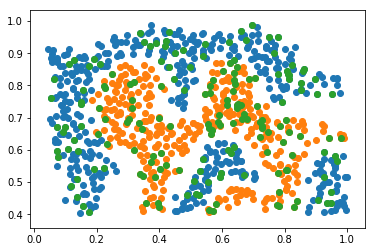

In [67]:
# Plot data to see what it looks like
pos_plot = plt.scatter(pos.values[:,0], pos.values[:,1])
neg_plot = plt.scatter(neg.values[:,0], neg.values[:,1])
plt.scatter(Xcv_a[:,0],Xcv_a[:,1])

In [68]:
#Check accuracy of grouping with cross-validation set
1-sum(np.absolute(clf.predict(Xcv_a)-ycv_a))/ycv_a.size

0.8265895953757225

In [69]:
# Same thing with built-in function score
clf.score(Xcv_a, ycv_a)

0.8265895953757225

In [70]:
# Same thing with built-in function score
clf.score(Xtrain_a, ytrain_a)

0.8115942028985508